<a href="https://colab.research.google.com/github/AIhexNICK-MAIL-RU/ML-projects-new/blob/main/Net_ml_hw8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Задание

## Цель: применить на практике базовые ансамблевые методы
Описание задания:
В домашнем задании нужно решить задачу классификации наличия болезни сердца у пациентов. Данные для обучения моделей необходимо загрузить самостоятельно с сайта. Целевая переменная – наличие болезни сердца (HeartDisease), принимает значения 0 или 1 в зависимости от отсутствия или наличия болезни соответственно. (Подробнее о признаках можно прочесть в описании датасета на сайте. Для выполнения работы не обязательно вникать в медицинские показатели.)

# Этапы работы:

# 1 Получите данные и загрузите их в рабочую среду. (Jupyter Notebook или другую)

In [97]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.model_selection import GridSearchCV
# from sklearn.metrics import make_scorer
from sklearn.metrics import r2_score
from sklearn.model_selection import ShuffleSplit

In [98]:
data = pd.read_csv('heart.csv')

In [99]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [100]:
data.shape

(918, 12)

In [101]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


# 2 Подготовьте датасет к обучению моделей.

### проверка на наличие уникальных значений переменных для приведения в цифровые

In [102]:
data['ChestPainType'].unique() # можно перевести в цифровые 0, 1, 2, 3

array(['ATA', 'NAP', 'ASY', 'TA'], dtype=object)

In [103]:
data['FastingBS'].unique() # цифровые

array([0, 1])

In [104]:
data['RestingECG'].unique() # можно перевести в цифровые 0, 1, 2

array(['Normal', 'ST', 'LVH'], dtype=object)

In [105]:
data['ExerciseAngina'].unique() # можно перевести в цифровые 0 и 1

array(['N', 'Y'], dtype=object)

In [106]:
data['Oldpeak'].unique() # цифровые

array([ 0. ,  1. ,  1.5,  2. ,  3. ,  4. ,  0.5,  2.5,  5. ,  0.8,  0.7,
        1.4,  2.1,  0.4,  0.2,  1.7,  2.2,  0.1,  1.6,  1.3,  0.3,  1.8,
        2.6, -0.9,  2.8, -2.6, -1.5, -0.1,  0.9,  1.1,  2.4, -1. , -1.1,
       -0.7, -0.8,  3.7,  1.2, -0.5, -2. ,  1.9,  3.5,  0.6,  3.1,  2.3,
        3.4,  3.6,  4.2,  3.2,  5.6,  3.8,  2.9,  6.2,  4.4])

In [107]:
data['ST_Slope'].unique() # можно перевести в цифровые 0, 1, 2

array(['Up', 'Flat', 'Down'], dtype=object)

In [108]:
data['HeartDisease'].unique() # цифровые 0 и 1

array([0, 1])

## a) Категориальные переменные переведите в цифровые значения. Можно использовать pd.get_dummies, preprocessing.LabelEncoder. Старайтесь не использовать для этой задачи циклы.

In [109]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [110]:
data.head(1)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0


In [111]:
# EA = data['ExerciseAngina']
# EA.head()

In [112]:
le.fit(data['ExerciseAngina'])
le.transform(['N', 'Y'])
EA = pd.Series(data=le.transform(data['ExerciseAngina']))
EA.head()

0    0
1    0
2    0
3    1
4    0
dtype: int64

In [113]:
le.fit(data['Sex'])
le.transform(['M', 'F'])
Sx = pd.Series(data=le.transform(data['Sex']))
Sx.head()

0    1
1    0
2    1
3    0
4    1
dtype: int64

In [114]:
le.fit(data['ChestPainType'])
le.transform(['ATA', 'NAP', 'ASY', 'TA'])
CPT = pd.Series(data=le.transform(data['ChestPainType']))
CPT.head()

0    1
1    2
2    1
3    0
4    2
dtype: int64

In [115]:
le.fit(data['RestingECG'])
le.transform(['Normal', 'ST', 'LVH'])
RECG = pd.Series(data=le.transform(data['RestingECG']))
RECG.head()

0    1
1    1
2    2
3    1
4    1
dtype: int64

In [116]:
STS = data['ST_Slope']
le.fit(data['ST_Slope'])
le.transform(['Up', 'Flat', 'Down'])
STS = pd.Series(data=le.transform(data['ST_Slope']))
STS.head()

0    2
1    1
2    2
3    1
4    2
dtype: int64

In [117]:
final_df = pd.concat([data['Age'], Sx, CPT, data['RestingBP'], data['Cholesterol'], data['FastingBS'], RECG, data['MaxHR'], EA, data['Oldpeak'], STS, data['HeartDisease']],axis=1)
final_df.head()

,Age,0,1,RestingBP,Cholesterol,FastingBS,2,MaxHR,3,Oldpeak,4,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


In [118]:
#selectedColumns = data['Age', 'Sx', 'CPT', 'RestingBP', 'Cholesterol', 'FastingBS', 'RECG', 'MaxHR', 'EA', 'Oldpeak', 'STS', 'HeartDisease']
selectedColumns = data[['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS', 'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope']]
selectedColumns.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up


In [119]:
# selectedColumns = data[[]]
# selectedColumns.head()
X = pd.get_dummies(selectedColumns, columns=['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], drop_first=True)
X.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,1,1,0,0,1,0,0,0,1
1,49,160,180,0,156,1.0,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,1,1,0,0,0,1,0,0,1
3,48,138,214,0,108,1.5,0,0,0,0,1,0,1,1,0
4,54,150,195,0,122,0.0,1,0,1,0,1,0,0,0,1


#### Выводы для себя:
Если говорить про решение задачи без цикла, то открыл для себя 2 способа сделать новый датасет для последующей работы, пока не понятно как работает get_dummies, и насколько верно делать тем или иным способом.
Хотя мне и пока не понятно как решать задачу в цикле.
В первом способе теряются названия и просто нумеруются последовательно начиная с нуля (final_df).

## b) *Постройте 1-2 графика на выбор. Визуализация должна быть основана на исследуемых данных и быть полезной (из графика можно сделать вывод об особенностях датасета/класса/признака).

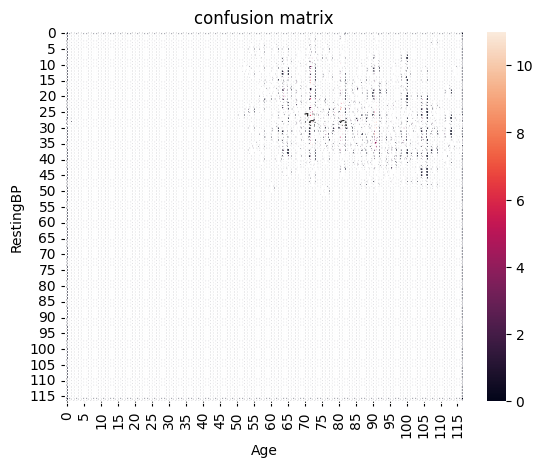

In [120]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(X['Age'], X['RestingBP'])
sns.heatmap(cm, annot=True)

plt.title('confusion matrix')
plt.xlabel('Age')
plt.ylabel('RestingBP');

In [121]:
# plt.figure(figsize=(10, 8))
# sns.set(font_scale=1.4)
# sns.heatmaps(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm') # heatmaps есть только в sns
# plt.title('Correlation matrix')

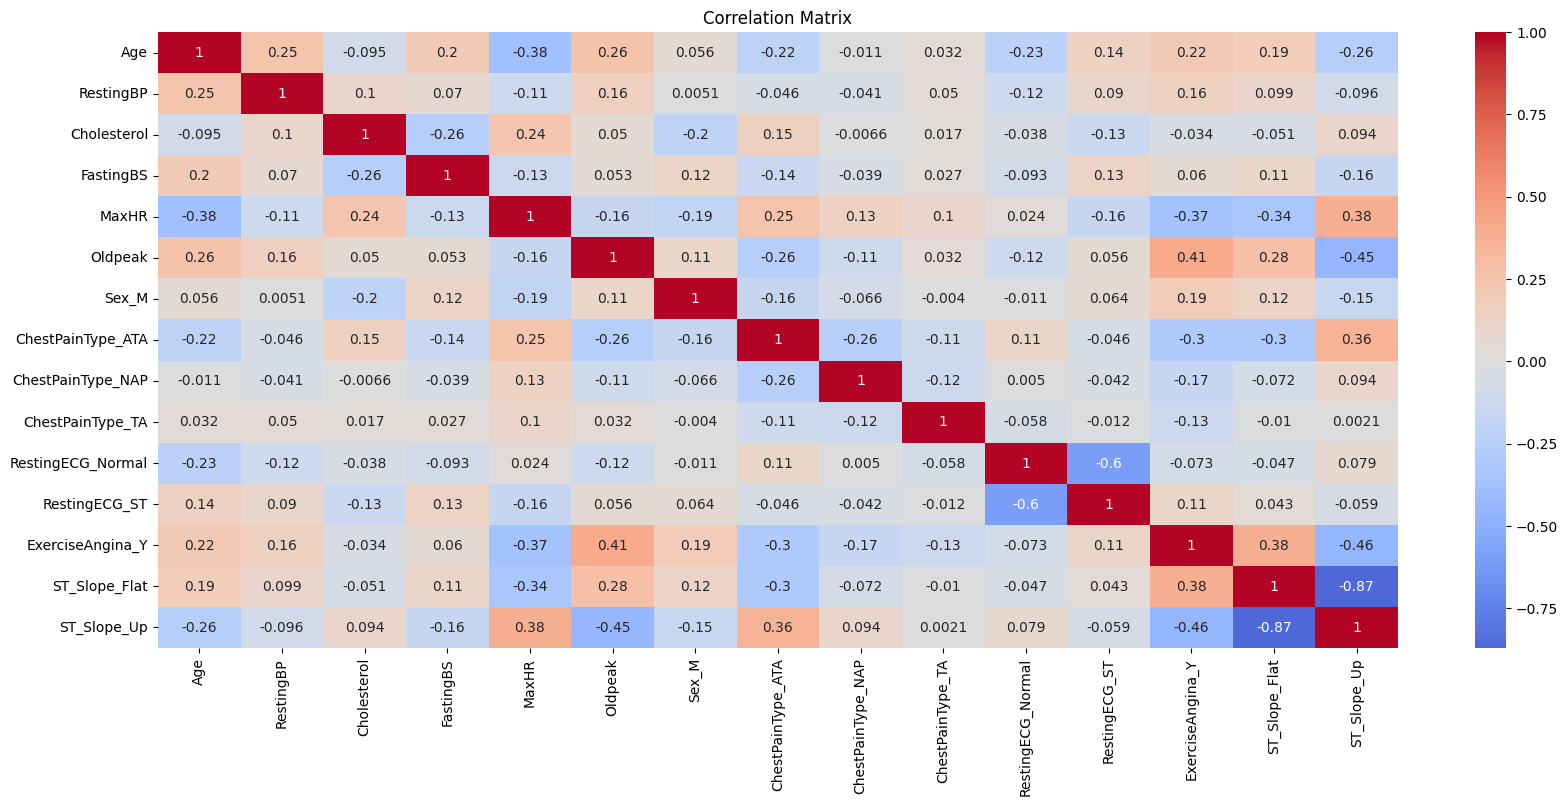

In [122]:
correlation_matrix = X.corr()
plt.figure(figsize=(20, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

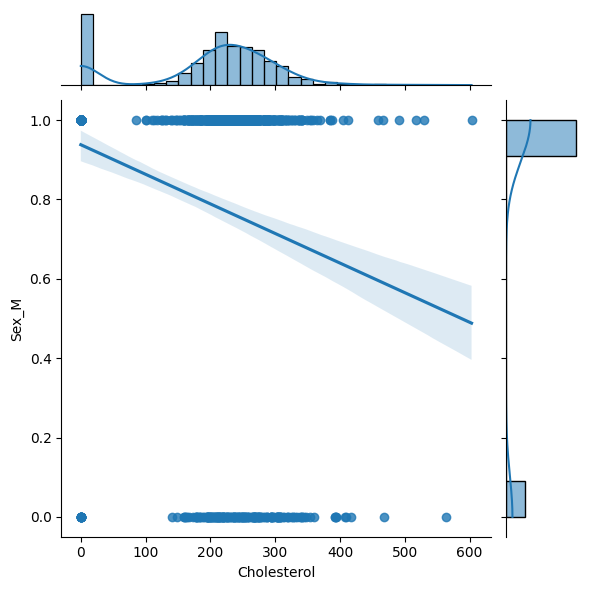

In [123]:
sns.jointplot(x=X['Cholesterol'], y = X['Sex_M'], kind='reg')

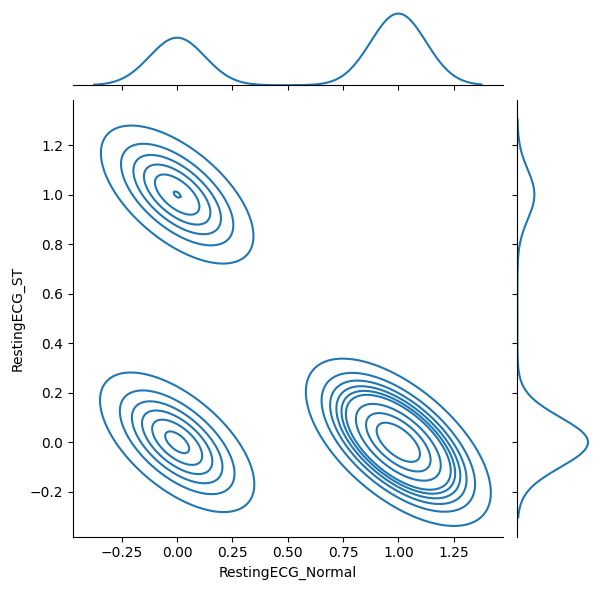

In [124]:
sns.jointplot(x=X['RestingECG_Normal'], y=X['RestingECG_ST'], kind='kde');

CPU times: user 1min 2s, sys: 1.5 s, total: 1min 3s
Wall time: 1min 3s


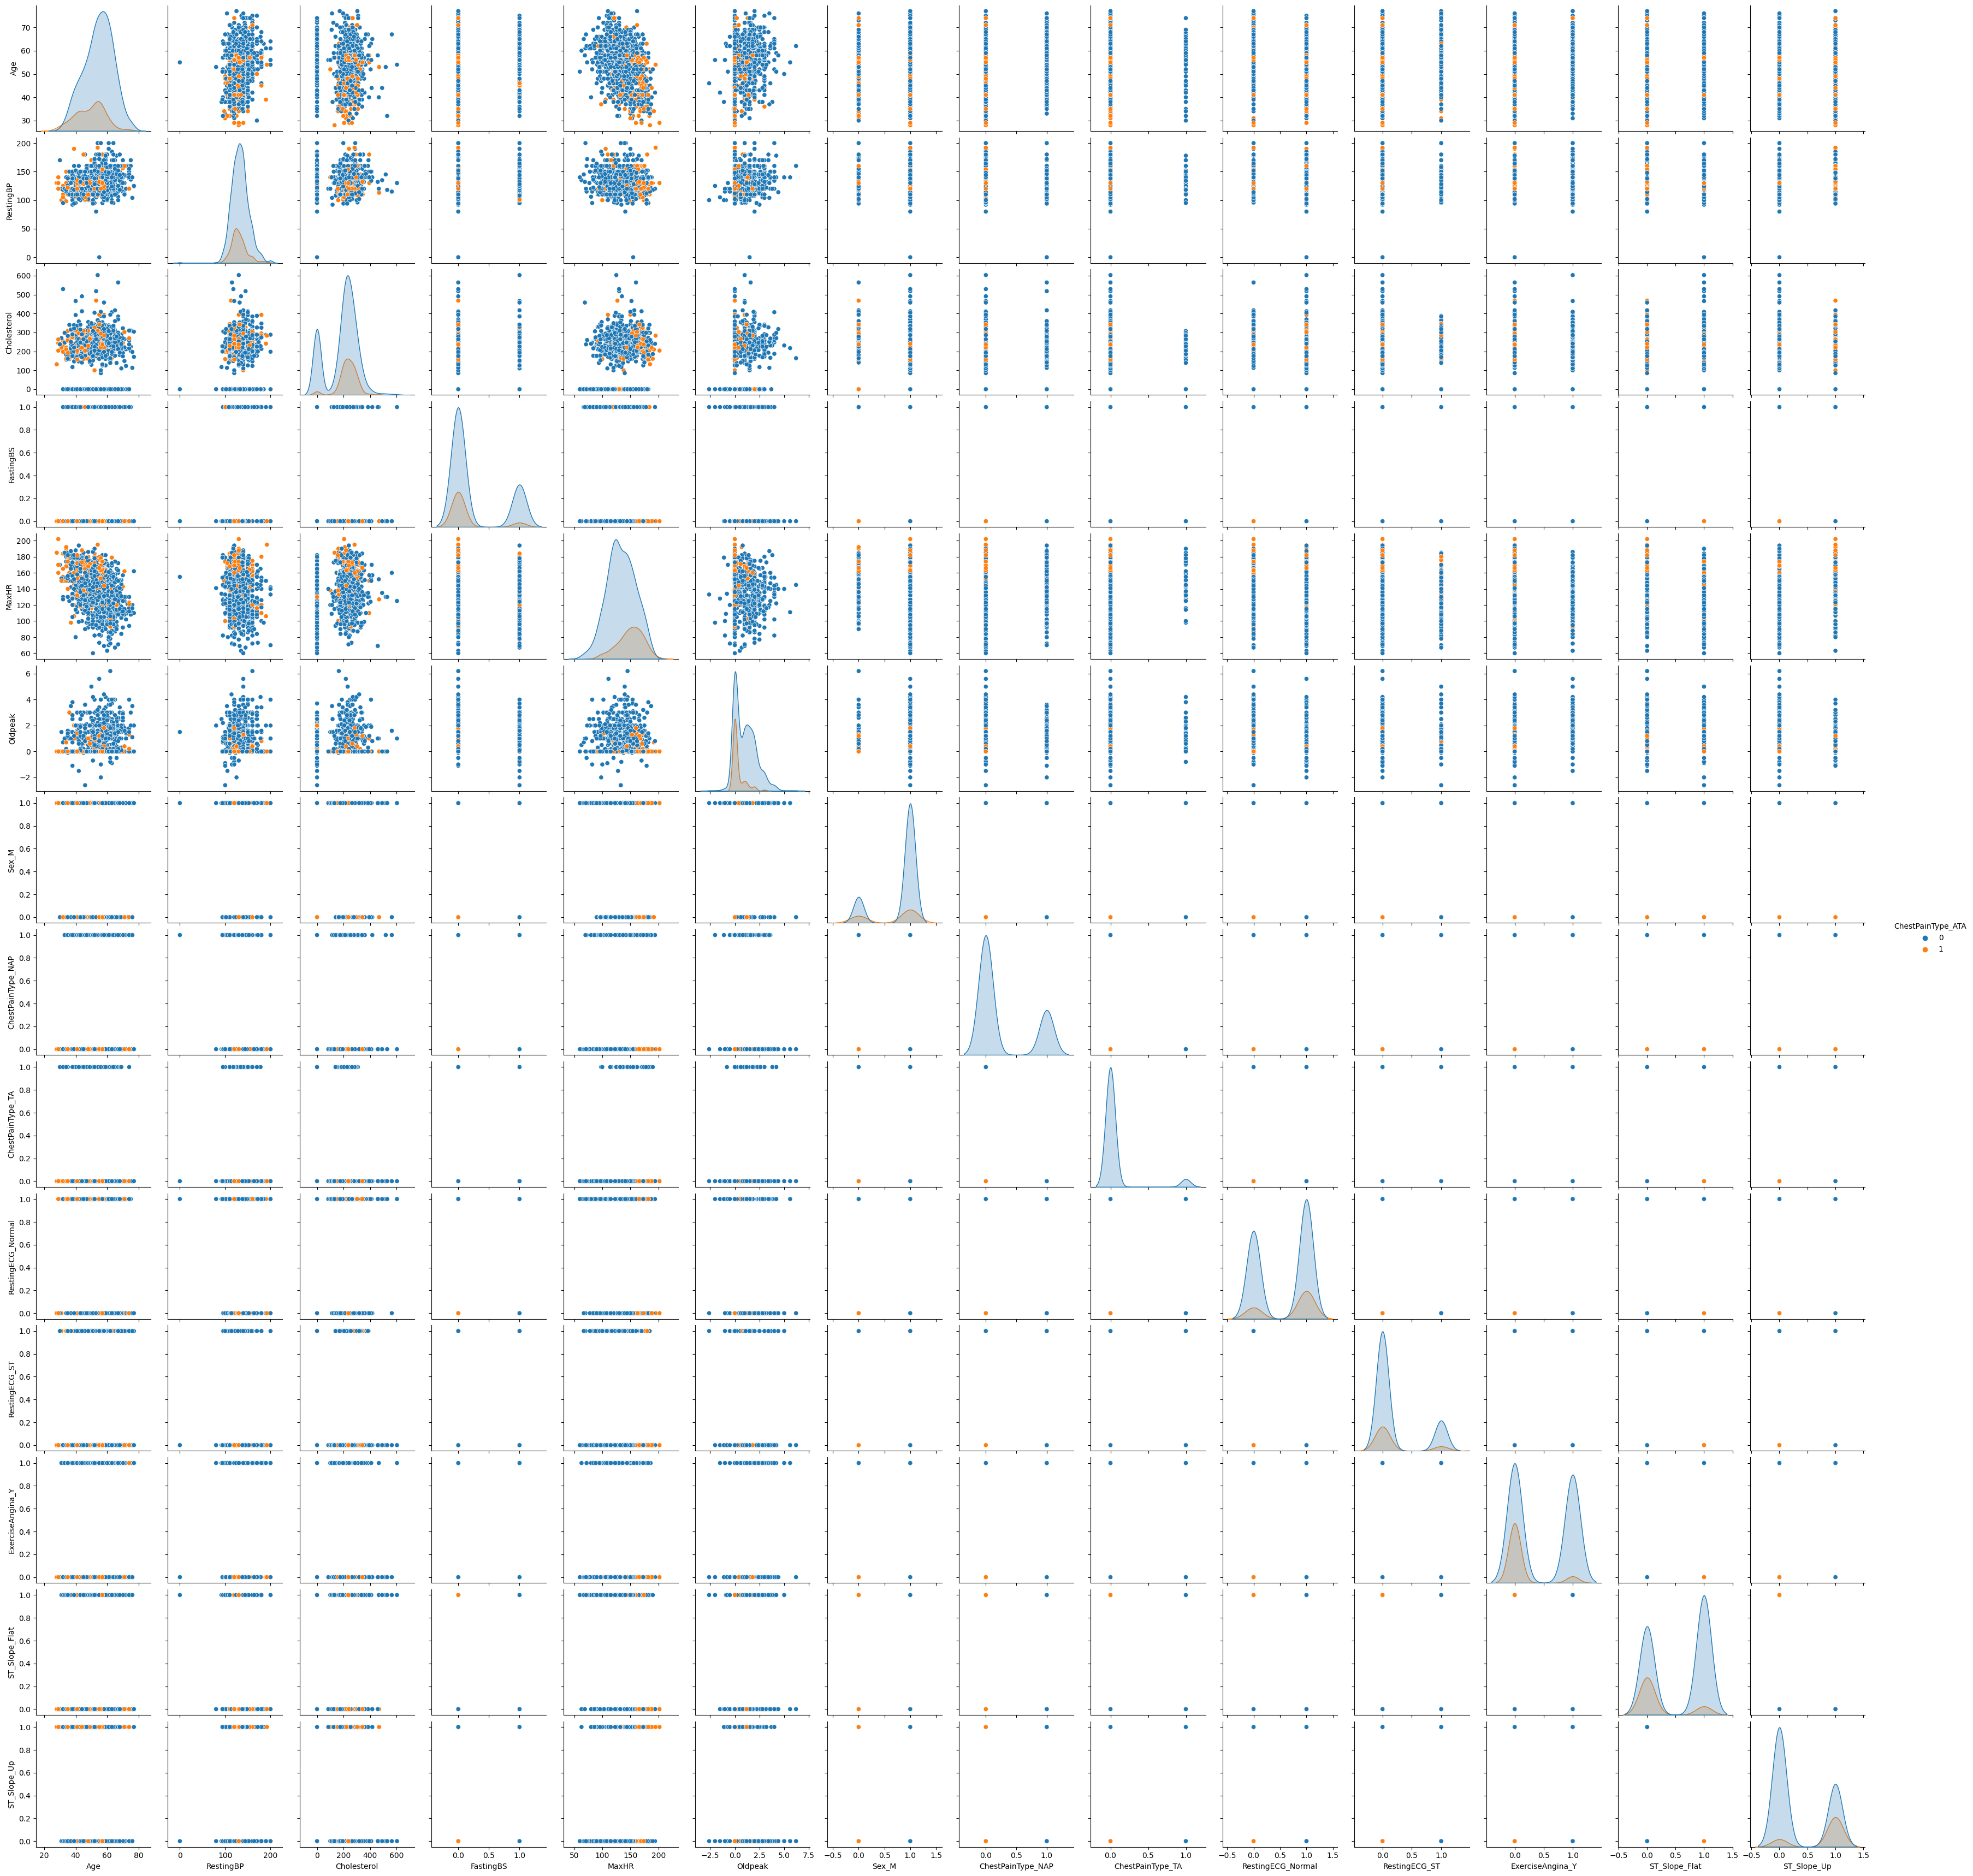

In [125]:
%%time
sns.pairplot(X, hue='ChestPainType_ATA', diag_kind="kde");

# 3 Разделите выборку на обучающее и тестовое подмножество. 80% данных оставить на обучающее множество, 20% на тестовое.

In [129]:
y = data['HeartDisease']

In [130]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_test.index

Int64Index([668,  30, 377, 535, 807, 793, 363, 583, 165, 483,
            ...
            265, 478, 333, 787,  97, 211, 745, 584, 878, 451],
           dtype='int64', length=184)

# 4 Обучите дерево решений на обучающем множестве. Используйте следующие модели:

In [131]:
from sklearn.tree import DecisionTreeClassifier

## a) tree.DecisionTreeClassifier

In [132]:
DTC = DecisionTreeClassifier(max_depth=2)

In [133]:
DTC.fit(X, y)

DecisionTreeClassifier(max_depth=2)

In [134]:
DTC.predict(X)

array([0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,

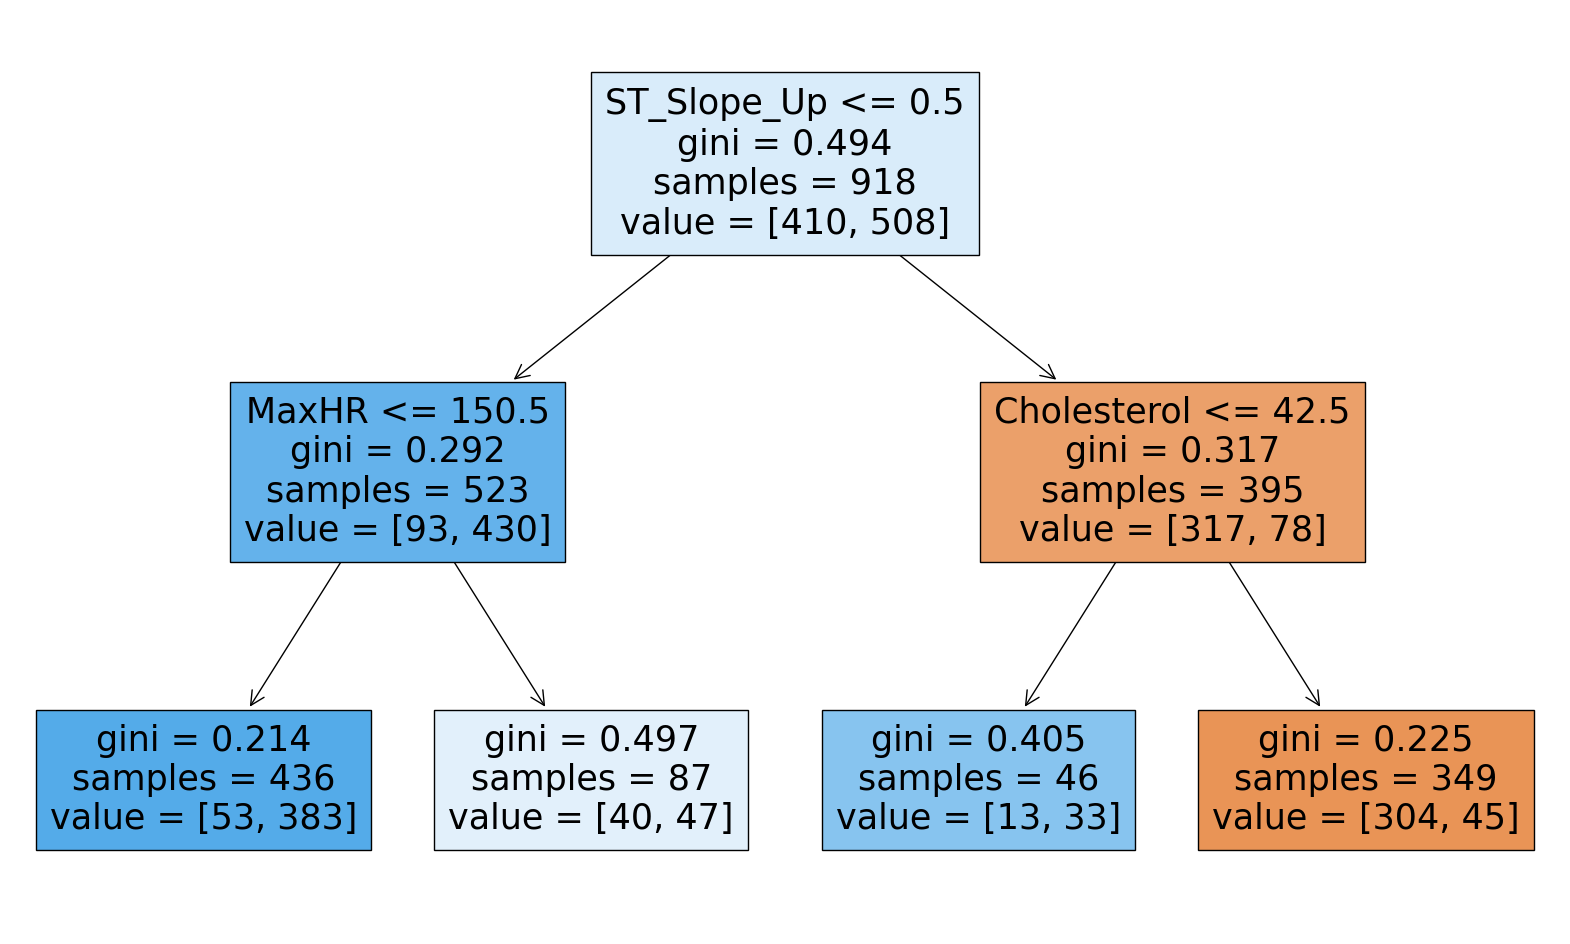

In [135]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 12))
plot_tree(DTC, feature_names=X.columns, filled=True);

## b) ensemble.RandomForestClassifier

In [136]:
from sklearn.ensemble import RandomForestClassifier

In [137]:
RFC = RandomForestClassifier(max_depth=2)

In [138]:
RFC.fit(X, y)

RandomForestClassifier(max_depth=2)

In [139]:
y

0      0
1      1
2      0
3      1
4      0
      ..
913    1
914    1
915    1
916    1
917    0
Name: HeartDisease, Length: 918, dtype: int64

In [127]:
# Тут нет деревевьев??
# from sklearn.tree import plot_tree

# plt.figure(figsize=(20, 12))
# plot_tree(clf1, feature_names=X.columns, filled=True);

# 5 Для тестового множества сделайте предсказание целевой переменной. Выведите метрики для каждой построенной модели с помощью metrics.classification_report.

In [140]:
print(X_test.shape)

(184, 15)


In [141]:
print(X_train.shape)

(734, 15)


#### вывод метрик
Вопрос: верно ли таким образом выводить метрики? Т.е.:

1) reshape целевой переменной

2) обучить через OneHotEncoder

3) трансформировать

4) сделать предсказание

5) распечатать в classification_report целевую переменную и предсказанную

In [142]:
from sklearn.metrics import classification_report

In [143]:
y1 = y.array.reshape(-1,1)

In [145]:
from sklearn.preprocessing import OneHotEncoder
OHE = OneHotEncoder(handle_unknown="ignore")
OHE.fit(y1)
y1 = OHE.transform(y1)

In [148]:
pred2 = clf1.predict(X)

In [149]:
print(classification_report(y, pred2))

              precision    recall  f1-score   support

           0       0.85      0.77      0.81       410
           1       0.83      0.89      0.86       508

    accuracy                           0.84       918
   macro avg       0.84      0.83      0.83       918
weighted avg       0.84      0.84      0.84       918



# 6 Выведите важность признаков, полученную после обучения модели из п. 4b в виде столбчатой диаграммы. Отсортируйте важность по убыванию.

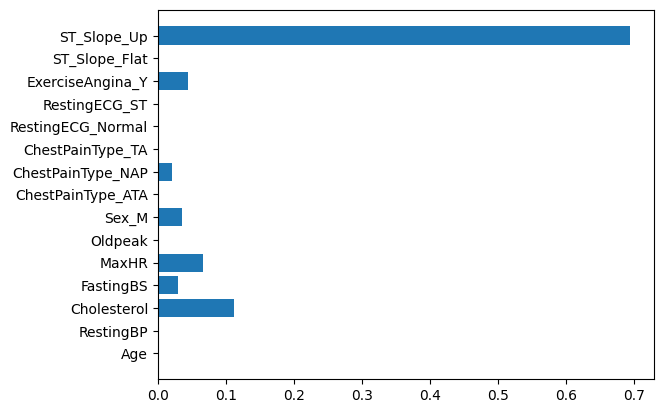

In [231]:
DTC = DecisionTreeClassifier(max_depth=3) # не помню как сортировать по убыванию
DTC.fit(X, y) #  правильно ли я задал параметры для визуализации?

plt.barh(np.arange(len(DTC.feature_importances_)), DTC.feature_importances_)
plt.yticks(np.arange(len(X.columns)), X.columns)
plt.show()

# 7 Обучите бэггинг над моделью из п. 4a. Используйте ensemble.BaggingClassifier.

In [180]:
from sklearn.ensemble import BaggingClassifier

In [184]:
bagging_dtc = BaggingClassifier(DecisionTreeClassifier(),
                           n_estimators=10,
                           max_samples=0.5,
                           max_features=0.5,
                           random_state=10)

In [185]:
DTC2 = DecisionTreeClassifier(random_state=10)
DTC2.fit(X_train, y_train)
DTC2.score(X_train, y_train)

1.0

In [186]:
DTC2.score(X_test, y_test)

0.8369565217391305

In [187]:
bagging_dtc.fit(X_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(), max_features=0.5,
                  max_samples=0.5, random_state=10)

In [188]:
bagging_dtc.score(X_train, y_train)

0.9536784741144414

In [189]:
bag_dtc_score = bagging_dtc.score(X_test, y_test)
bag_dtc_score

0.8097826086956522

## a) Повторите п. 5

In [193]:
y_bag_dtc = y_test.array.reshape(-1,1)

In [198]:
from sklearn.preprocessing import OneHotEncoder
oneh = OneHotEncoder(handle_unknown="ignore")
oneh.fit(y_bag_dtc)

y_bag_dtc = oneh.transform(y_bag_dtc)

In [201]:
pred_y_bag_dtc = bagging_dtc.predict(X)

In [204]:
print(classification_report(y, pred_y_bag_dtc))

              precision    recall  f1-score   support

           0       0.90      0.93      0.92       410
           1       0.94      0.92      0.93       508

    accuracy                           0.92       918
   macro avg       0.92      0.93      0.92       918
weighted avg       0.93      0.92      0.92       918



# 8 Обучите стекинг трех моделей: из п. 4a, п. 4b и svm.LinearSVC. Используйте ensemble.StackingClassifier.

In [207]:
from sklearn.ensemble import StackingClassifier
from sklearn.svm import LinearSVC

#### делаем LinearSVC

In [208]:
LSVC = LinearSVC(random_state=10)
LSVC.fit(X_train, y_train)
LSVC.score(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.8637602179836512

In [210]:
LSVC.score(X_test, y_test)

0.8478260869565217

In [211]:
LSVC.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(random_state=10)

In [212]:
LSVC.score(X_train, y_train)

0.8637602179836512

In [213]:
LSVC_score = LSVC.score(X_test, y_test)
LSVC_score

0.8478260869565217

In [215]:
stack_class = StackingClassifier(
    [
        ('DecisionTreeClassifier', DecisionTreeClassifier()),
        ('RandomForestClassifier', RandomForestClassifier()),
        ('LinearSVC', LinearSVC())
    ])

In [216]:
stack_class.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

StackingClassifier(estimators=[('DecisionTreeClassifier',
                                DecisionTreeClassifier()),
                               ('RandomForestClassifier',
                                RandomForestClassifier()),
                               ('LinearSVC', LinearSVC())])

In [217]:
print(f'Score on train  {stack_class.score(X_train, y_train)}')
print(f'Score on test  {stack_class.score(X_test, y_test)}')

Score on train  0.997275204359673
Score on test  0.8641304347826086


In [218]:
for i in stack_class.named_estimators:
    print(f'Score on train  with model {i} {stack_class.named_estimators_[i].score(X_train, y_train)}')
    print(f'Score on test  with model {i} {stack_class.named_estimators_[i].score(X_test, y_test)}')

Score on train  with model DecisionTreeClassifier 1.0
Score on test  with model DecisionTreeClassifier 0.8532608695652174
Score on train  with model RandomForestClassifier 1.0
Score on test  with model RandomForestClassifier 0.8695652173913043
Score on train  with model LinearSVC 0.8528610354223434
Score on test  with model LinearSVC 0.8152173913043478


## a) Повторите п. 5

In [ ]:
stack_class.fit(X_train, y_train)

In [234]:
pred_y_stack = stack_class.predict(X_test)
pred_y_stack

array([0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1])

In [236]:
print(classification_report(y_test, pred_y_stack))

              precision    recall  f1-score   support

           0       0.84      0.83      0.84        77
           1       0.88      0.89      0.88       107

    accuracy                           0.86       184
   macro avg       0.86      0.86      0.86       184
weighted avg       0.86      0.86      0.86       184



# 9 Сформулируйте выводы по проделанной работе.

## a) Сравните метрики построенных моделей.

In [243]:
print(classification_report(y, pred2))
print(classification_report(y, pred_y_bag_dtc))
print(classification_report(y_test, pred_y_stack))

              precision    recall  f1-score   support

           0       0.85      0.77      0.81       410
           1       0.83      0.89      0.86       508

    accuracy                           0.84       918
   macro avg       0.84      0.83      0.83       918
weighted avg       0.84      0.84      0.84       918

              precision    recall  f1-score   support

           0       0.90      0.93      0.92       410
           1       0.94      0.92      0.93       508

    accuracy                           0.92       918
   macro avg       0.92      0.93      0.92       918
weighted avg       0.93      0.92      0.92       918

              precision    recall  f1-score   support

           0       0.84      0.83      0.84        77
           1       0.88      0.89      0.88       107

    accuracy                           0.86       184
   macro avg       0.86      0.86      0.86       184
weighted avg       0.86      0.86      0.86       184



## b) Напишите свое мнение, какая модель наилучшая и почему.



1. Построенные графики мне ничего не говорят, или я не те графики строил, или неправильно строил, или не понимаю как их интерпретировать

2. В RandomForestClassifier нет деревевьев? Или я неправильно их построил? Потому что при вводе кода ниже у мен выходила ошибка, а хотелось их как-то визуализировать

from sklearn.tree import plot_tree

plt.figure(figsize=(20, 12))

plot_tree(clf1, feature_names=X.columns, filled=True);


3. Вопрос: верно ли таким образом выводить метрики? Т.е.:

1) reshape целевой переменной

2) обучить через OneHotEncoder

3) трансформировать

4) сделать предсказание

5) распечатать в classification_report целевую переменную и предсказанную

4. правильно ли я задал параметры для визуализации?

DTC = DecisionTreeClassifier(max_depth=3) # не помню как сортировать по убыванию

DTC.fit(X, y)

5. Для стекинга не нужно делать OneHotEncoder получается?

6. Если  все правильно сделал, то DecisionTreeClassifier справился лучше. По крайней мере у мен такие получились метрики.

In [ ]:
# По-моему ensemble.StackingClassifier справился с задачей лучше всех

### черновики

In [ ]:
# print(classification_report(y.clf, y.clf1))

In [ ]:
# pred_df2 = pd.DataFrame({
#     'ground truth': y1,
#     'prediction': pred2
# })

# pred_df2

In [ ]:
# sklearn.metrics.classification_report(y_train, y_test, *, labels=None, target_names=None, sample_weight=None, digits=2, output_dict=False, zero_division='warn')

In [ ]:
# print(classification_report(y_test, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        77
           1       1.00      1.00      1.00       107

    accuracy                           1.00       184
   macro avg       1.00      1.00      1.00       184
weighted avg       1.00      1.00      1.00       184



In [ ]:
DTC = DecisionTreeClassifier(max_depth=2)

In [ ]:
DTC.fit(X, y)

DecisionTreeClassifier(max_depth=2)

In [ ]:
from sklearn.ensemble import  BaggingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

In [ ]:
DTR = DecisionTreeRegressor(random_state=10)
DTR.fit(X_train, y_train)
DTR.score(X_train, y_train)

1.0

In [ ]:
DTR.score(X_test, y_test)

0.3300157786139095

In [ ]:
bagging_dtr.fit(X_train, y_train)

BaggingRegressor(estimator=DecisionTreeRegressor(), max_features=0.5,
                 max_samples=0.5, random_state=10)

In [ ]:
bagging_dtr.score(X_train, y_train)

0.7848780980481729

In [ ]:
bag_dtr_score = bagging_dtr.score(X_test, y_test)
bag_dtr_score

0.4483739504524552

In [ ]:
KNR = KNeighborsRegressor()
KNR.fit(X_train, y_train)
KNR.score(X_train, y_train)

0.43713089648251724

In [ ]:
KNR.score(X_test, y_test)

0.10222114334263877

In [ ]:
bagging = BaggingRegressor(KNeighborsRegressor(),
                           n_estimators=100,
                           max_samples=0.5,
                           max_features=0.5,
                           random_state=10)

In [ ]:
bagging.fit(X_train, y_train)

BaggingRegressor(estimator=KNeighborsRegressor(), max_features=0.5,
                 max_samples=0.5, n_estimators=100, random_state=10)

In [ ]:
bagging.score(X_train, y_train)

0.4843095733339323

In [ ]:
bag_knr_score = bagging.score(X_test, y_test)
bag_knr_score

0.29911860759800957

In [ ]:
>>> from sklearn.metrics import classification_report
>>> y_true = [0, 1, 2, 2, 0]
>>> y_pred = [0, 0, 2, 1, 0]
>>> target_names = ['class 0', 'class 1', 'class 2']
>>> print(classification_report(y_true, y_pred, target_names=target_names))
              precision    recall  f1-score   support

     class 0       0.67      1.00      0.80         2
     class 1       0.00      0.00      0.00         1
     class 2       1.00      0.50      0.67         2

    accuracy                           0.60         5
   macro avg       0.56      0.50      0.49         5
weighted avg       0.67      0.60      0.59         5

In [ ]:
print(classification_report(y_test, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        77
           1       1.00      1.00      1.00       107

    accuracy                           1.00       184
   macro avg       1.00      1.00      1.00       184
weighted avg       1.00      1.00      1.00       184

